**Install and import cirq**

In [1]:
# !pip install --upgrade
!pip install cirq
import cirq
from cirq.circuits import InsertStrategy
import matplotlib.pyplot as plt

**Strategy: EARLIEST**

In [2]:
q0, q1, q2, q3 = cirq.GridQubit.square(2)
circuit = cirq.Circuit(cirq.X(q0))
circuit.append([cirq.Y(q0), cirq.Y(q1)], strategy=InsertStrategy.EARLIEST)
print(circuit)

(0, 0): ───X───Y───

(0, 1): ───Y───────


**Strategy: INLINE**

In [3]:
circuit = cirq.Circuit()
circuit.append([cirq.CX(q1, q2)])
circuit.append([cirq.CX(q1, q2)])
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)],
               strategy=InsertStrategy.INLINE)
print(circuit)

(0, 0): ───────H───────

(0, 1): ───@───@───H───
           │   │
(1, 0): ───X───X───H───


**Strategy: NEW**

In [4]:
circuit = cirq.Circuit()
circuit.append([cirq.Z(q0), cirq.Z(q1), cirq.Z(q2)],
               strategy=InsertStrategy.NEW)
print(circuit)

(0, 0): ───Z───────────

(0, 1): ───────Z───────

(1, 0): ───────────Z───


**Strategy: NEW_THEN_INLINE**

In [5]:
circuit = cirq.Circuit()
circuit.append(cirq.X(q0))
circuit.append(cirq.Y(q1),
               strategy=InsertStrategy.NEW_THEN_INLINE)
circuit.append([cirq.CNOT(q0, q1), cirq.Z(q2)],
               strategy=InsertStrategy.NEW_THEN_INLINE)
print(circuit)

(0, 0): ───X───────@───
                   │
(0, 1): ───────Y───X───

(1, 0): ───────────Z───


**Circuit simulation: Bell state**

In [6]:
# Bell State: 1/sqrt(2) * ( |00⟩ + |11⟩ )
circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
circuit.append(cirq.H(q0))
circuit.append(cirq.CNOT(q0, q1))
print(circuit)

simulator = cirq.Simulator()
print(simulator.simulate(circuit))

0: ───H───@───
          │
1: ───────X───
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


**Sample the measurement**

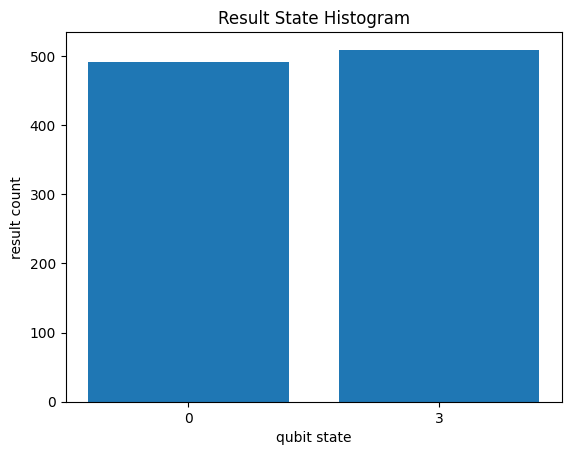

In [7]:
# add measurement
circuit.append(cirq.measure(q0, q1, key='result'))
samples = simulator.run(circuit, repetitions=1000)

cirq.plot_state_histogram(samples.histogram(key='result'), plt.subplot())
plt.show()